In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

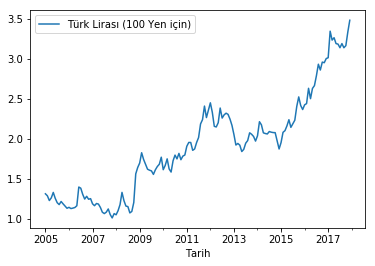

In [2]:
#Dosya okunuyor
df_tl = pd.read_csv("TL-YEN.csv", parse_dates=['Tarih'], index_col="Tarih", dayfirst=True)

#Gereksiz sütunlar siliniyor.
df_tl.drop(columns=["Yüksek","Düşük","Fark %", "Şimdi"], inplace=True)

#Alınan değerin float olduğunun anlaşılması sağlanıyor.
df_tl["Açılış"] = df_tl["Açılış"].str.replace(',', '.').astype(float)

#100 yenin Türk lirası karşılığı bulunuyor.
df_tl["Açılış"] = 100/df_tl["Açılış"]
df_tl.rename(columns={"Açılış":"Türk Lirası (100 Yen için)"}, inplace=True)

#Dataframe tersine çevriliyor.
df_tl = df_tl.iloc[::-1]

#İndeksten gün kısmı atılıyor, sadece ay ve yıl bırakılıyor.
df_tl.set_index(df_tl.index.to_period('M'), inplace=True)
df_tl = df_tl[:-5]
df_tl.plot.line()

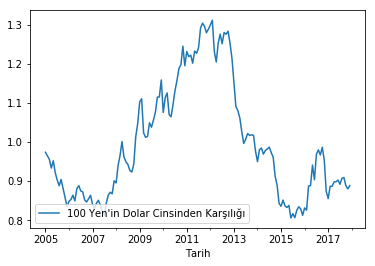

In [3]:
#Dosya okunuyor
df_yen = pd.read_csv("Dolar-Yen.csv", parse_dates=['Tarih'], index_col="Tarih", dayfirst=True)

#Gereksiz sütunlar siliniyor.
df_yen.drop(columns=["Yüksek","Düşük","Fark %", "Şimdi"], inplace=True)

#Alınan değerin float olduğunun anlaşılması sağlanıyor.
df_yen["Açılış"] = df_yen["Açılış"].str.replace(',', '.').astype(float)

#100 yenin dolar karşılığı bulunuyor.
df_yen["Açılış"] = 100/df_yen["Açılış"]
df_yen.rename(columns={"Açılış":"100 Yen'in Dolar Cinsinden Karşılığı"}, inplace=True)

#Dataframe tersine çevriliyor.
df_yen = df_yen.iloc[::-1]
df_yen = df_yen[:-5]

#df_tl'nin indeksi indeks olarak atanıyor.
df_yen.set_index(df_tl.index, inplace=True)

df_yen.plot.line()

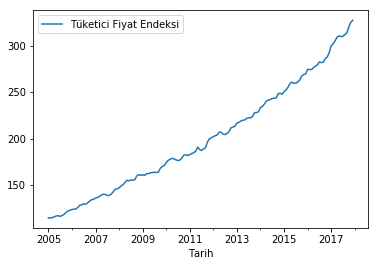

In [4]:
df_tufe = pd.read_excel("Tüketici Fiyat Endeksi.xls", skiprows=2)

#Gereksiz kısımlar atılıyor.
df_tufe = df_tufe.iloc[:17]
df_tufe.drop(range(0, 3), inplace=True)

df_tufe.rename(columns={"Unnamed: 0":"Yıl"}, inplace=True)
df_tufe.set_index("Yıl", inplace=True)

#Dataframe düzleştirilerek tek sütun haline getiriliyor.
df_tufe = pd.DataFrame(df_tufe.values.flatten(), columns={"Tüketici Fiyat Endeksi"})

#NA kısımlar atılıyor.
df_tufe.dropna(inplace=True)
#Son 4 değer siliniyor.
df_tufe = df_tufe[:-4]
df_tufe.set_index(df_tl.index, inplace=True)
df_tufe.plot.line()

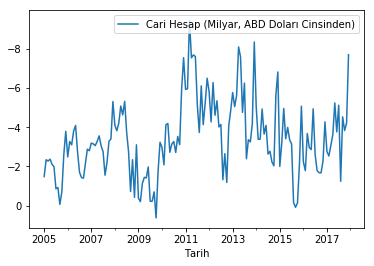

In [5]:
df_cari = pd.read_excel("Cari İşlemler.xlsx")
df_cari.drop([0, 159], inplace=True)
df_cari["Açıklanan"] = df_cari["Açıklanan"].astype(float)
#Dataframe terisne döndürülüyor
df_cari = df_cari[::-1]
df_cari = df_cari[:-2]
df_cari.set_index(df_tl.index, inplace=True)
df_cari.drop(columns=["Zaman","Beklenti","Önceki","Yayınlanma Tarihi"], inplace=True)
df_cari.rename(columns={"Açıklanan":"Cari Hesap (Milyar, ABD Doları Cinsinden)"}, inplace=True)
df_cari.plot.line().invert_yaxis()

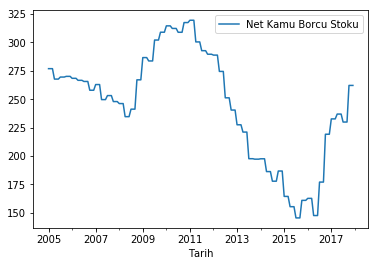

In [6]:
df_kamu = pd.read_excel("Net Kamu Borcu Stoku.xls", skiprows=3)
#Gereksiz kısımlar atılıyor.
df_kamu = df_kamu[:-8]
df_kamu = df_kamu[17:]

df_kamu.reset_index(inplace=True, drop=True)
sutun= [0, 1, 2, 3, 4, 5, 6, 7, 9]

#Gereksiz kısımlar atılıyor.
df_kamu.drop(df_kamu.columns[sutun],axis=1,inplace=True)          
df_kamu.rename(columns={"KAMU NET BORÇ STOKU                      (I - II - III - IV)":"Net Kamu Borcu Stoku"}, inplace=True)
#Kamur borcu çeyrek yıl için hesaplandığından, ay cinsinden olmadığından bunu 12 aya yaymak için her biri 3'er kere tekrar ettiriliyor.
kamu_borc = df_kamu["Net Kamu Borcu Stoku"].repeat(3)
df_kamu = pd.DataFrame()
df_kamu['Net Kamu Borcu Stoku'] = kamu_borc
df_kamu.set_index(df_tl.index, inplace=True)
df_kamu.plot.line()

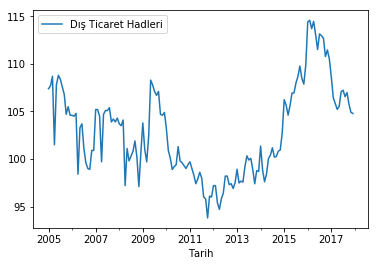

In [7]:
df_had = pd.read_csv("Ticaret Hadleri.csv", skiprows=1, sep="|")
sutun = [0, 1, 2, 3, 4, 6]
df_had.drop(df_had.columns[sutun],axis=1,inplace=True)
df_had.rename(columns={"Türkiye-TR":"Dış Ticaret Hadleri"}, inplace=True)
df_had.dropna(inplace=True)
df_had["Dış Ticaret Hadleri"] = df_had["Dış Ticaret Hadleri"].astype(float)
df_had = df_had[:-3]
df_had.set_index(df_tl.index, inplace=True)
df_had.plot.line()

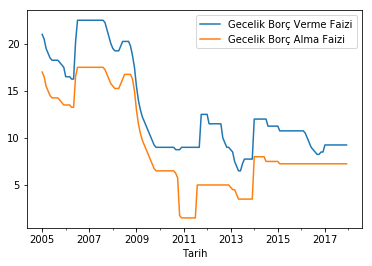

In [8]:
df_faiz = pd.read_excel("Faiz.xlsx")
df_faiz = df_faiz[16:]
df_faiz['Tarih'] = pd.to_datetime(df_faiz['Tarih'], dayfirst=True)
df_faiz['Borç Alma'].astype(float)
df_faiz['Borç Verme'].astype(float)

#Borç alma ve verme faizi belirli periyotlarla düzenlenen değerler değiller. TCMB ne zaman isterse o zaman düzenleniyorlar. 
#Bir dahaki düzenlemeye kadar da bir önceki değer geçerli oluyor.
#TCMB dilerse bir ayda 3 kere bile faiz oranlarını değiştirebiliyor.
#Bu gerçekler ışığında 2005'ten bu yana olan faiz oranlarının ay karşılıkları verilen veriden aşağıdaki döngüler ile oluşturulmuştur.
#Bir ayda birden fazla faiz değişimi olması durumunda faizlerin ortalamalarının alınması uygun görülmüştür.


faiz_v = df_faiz.iloc[0:5]["Borç Verme"].values.tolist()
faiz_a = df_faiz.iloc[0:5]["Borç Alma"].values.tolist()

for i in range(0,4):
    faiz_v.append(df_faiz.iloc[5]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[5]["Borç Alma"].tolist())
    
for i in range(6,9):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())
    
for i in range(0,3):
    faiz_v.append(df_faiz.iloc[9]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[9]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[10]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[10]["Borç Alma"].tolist())
    
faiz_v.append(((df_faiz.iloc[11]["Borç Verme"]+df_faiz.iloc[12]["Borç Verme"]+df_faiz.iloc[13]["Borç Verme"])/3).tolist())
faiz_a.append(((df_faiz.iloc[11]["Borç Alma"]+df_faiz.iloc[12]["Borç Alma"]+df_faiz.iloc[13]["Borç Alma"])/3).tolist())

for i in range(0,14):
    faiz_v.append(df_faiz.iloc[14]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[14]["Borç Alma"].tolist())
    
for i in range(15,20):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())

for i in range(0,3):
    faiz_v.append(df_faiz.iloc[20]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[20]["Borç Alma"].tolist())

for i in range(21,23):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())
    
for i in range(0,3):
    faiz_v.append(df_faiz.iloc[23]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[23]["Borç Alma"].tolist())
    
for i in range(24,37):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())

for i in range(0,10):
    faiz_v.append(df_faiz.iloc[37]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[37]["Borç Alma"].tolist())
    
for i in range(38,41):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())

for i in range(0,8):
    faiz_v.append(df_faiz.iloc[41]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[41]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[42]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[42]["Borç Alma"].tolist())
    
for i in range(0,4):
    faiz_v.append(df_faiz.iloc[43]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[43]["Borç Alma"].tolist())
    
for i in range(0,7):
    faiz_v.append(df_faiz.iloc[44]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[44]["Borç Alma"].tolist())
    
for i in range(45,47):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[47]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[47]["Borç Alma"].tolist())
    
for i in range(48,52):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[52]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[52]["Borç Alma"].tolist())
    
faiz_v.append(df_faiz.iloc[53]["Borç Verme"].tolist())
faiz_a.append(df_faiz.iloc[53]["Borç Alma"].tolist())

for i in range(0,5):
    faiz_v.append(df_faiz.iloc[54]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[54]["Borç Alma"].tolist())
    
for i in range(0,6):
    faiz_v.append(df_faiz.iloc[55]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[55]["Borç Alma"].tolist())
    
faiz_v.append(df_faiz.iloc[56]["Borç Verme"].tolist())
faiz_a.append(df_faiz.iloc[56]["Borç Alma"].tolist())

for i in range(0,6):
    faiz_v.append(df_faiz.iloc[57]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[57]["Borç Alma"].tolist())
    
for i in range(0,13):
    faiz_v.append(df_faiz.iloc[58]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[58]["Borç Alma"].tolist())
    
for i in range(59,65):
    faiz_v.append(df_faiz.iloc[i]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[i]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[65]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[65]["Borç Alma"].tolist())
    
for i in range(0,2):
    faiz_v.append(df_faiz.iloc[66]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[66]["Borç Alma"].tolist())
    
for i in range(0,12):
    faiz_v.append(df_faiz.iloc[67]["Borç Verme"].tolist())
    faiz_a.append(df_faiz.iloc[67]["Borç Alma"].tolist())
    
df_faiz = pd.DataFrame()
df_faiz["Gecelik Borç Verme Faizi"] = faiz_v
df_faiz["Gecelik Borç Alma Faizi"] = faiz_a

df_faiz.set_index(df_tl.index, inplace=True)
df_faiz["Gecelik Borç Verme Faizi"] = df_faiz["Gecelik Borç Verme Faizi"].astype(float)
df_faiz["Gecelik Borç Alma Faizi"] = df_faiz["Gecelik Borç Alma Faizi"].astype(float)
df_faiz.plot.line()


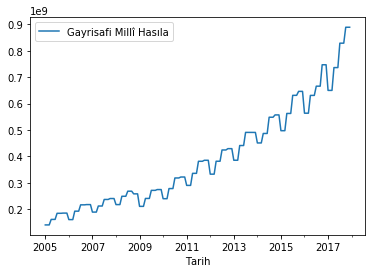

In [9]:
df_gsmh = pd.read_csv("GSMH.csv", sep="|", skiprows=2)
sutun = [0, 1, 2, 3, 8]
df_gsmh.drop(df_gsmh.columns[sutun],axis=1,inplace=True)
df_gsmh = df_gsmh[:-1]
#Dataframe düzleştirilip tek boyuta indirgeniyor ve listeye atılıyor
gsmh = df_gsmh.values.flatten().repeat(3)
df_gsmh = pd.DataFrame()
#Listeden dataframe oluşturuluyor.
df_gsmh["Gayrisafi Millî Hasıla"] = gsmh
df_gsmh.set_index(df_tl.index, inplace=True)
df_gsmh.plot.line()

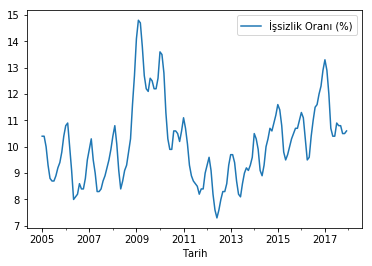

In [10]:
#İşsizlikle ilgili 2014 öncesi ve sonrası olmak üzere iki veri var. Burada bu veriler birleştiriliyor

df_issizlik_1 = pd.read_excel("Issizlik Orani_1.xls", skiprows=3)
df_issizlik_1 = df_issizlik_1[:-3]
sutun = [list(range(0,14))+list(range(15,25))]
df_issizlik_1.drop(df_issizlik_1.columns[sutun],axis=1,inplace=True)
satir = list(range(12, 120, 13))
df_issizlik_1.drop(satir, inplace=True)

df_issizlik_2 = pd.read_csv("Issizlik Orani_2.csv", sep="|", skiprows=2)
df_issizlik_2.drop([0, 5, 6], inplace=True)
df_issizlik_2.drop(df_issizlik_2.columns[[0, 1, 2, 15]],axis=1,inplace=True)
df_issizlik_2.values.flatten()

issizlik = df_issizlik_1.values.flatten().tolist()
issizlik.extend(df_issizlik_2.values.flatten().tolist())
df_issizlik = pd.DataFrame()
df_issizlik["İşsizlik Oranı (%)"] = issizlik
df_issizlik.set_index(df_tl.index, inplace=True)
df_issizlik.plot.line()

In [11]:
#Şu ana kadar oluşturulmuş tüm dataframe'ler tek bir dataframe'de birleştiriliyor.

df_veri = pd.concat([df_tufe, df_faiz, df_cari, df_had, df_kamu, df_gsmh, df_issizlik, df_yen, df_tl], axis=1)
df_veri

,Tüketici Fiyat Endeksi,Gecelik Borç Verme Faizi,Gecelik Borç Alma Faizi,"Cari Hesap (Milyar, ABD Doları Cinsinden)",Dış Ticaret Hadleri,Net Kamu Borcu Stoku,Gayrisafi Millî Hasıla,İşsizlik Oranı (%),100 Yen'in Dolar Cinsinden Karşılığı,Türk Lirası (100 Yen için)
Tarih,,,,,,,,,,
2005-01,114.49,21.000000,17.00,-1.48,107.40,276.901823,141042563.0,10.4,0.973805,1.314631
2005-02,114.51,20.500000,16.50,-2.34,107.70,276.901823,141042563.0,10.4,0.964599,1.289674
2005-03,114.81,19.500000,15.50,-2.27,108.70,276.901823,141042563.0,10.0,0.955932,1.230285
2005-04,115.63,19.000000,15.00,-2.37,101.50,267.722362,161871870.0,9.3,0.933358,1.264238
2005-05,116.69,18.500000,14.50,-2.11,107.80,267.722362,161871870.0,8.8,0.952109,1.332001
2005-06,116.81,18.250000,14.25,-1.98,108.80,267.722362,161871870.0,8.7,0.921574,1.257941
2005-07,116.14,18.250000,14.25,-0.86,108.40,269.518617,185021848.0,8.7,0.902935,1.203616
2005-08,117.13,18.250000,14.25,-0.92,107.60,269.518617,185021848.0,8.9,0.888257,1.179955
2005-09,118.33,18.250000,14.25,-0.06,106.80,269.518617,185021848.0,9.2,0.904323,1.218576


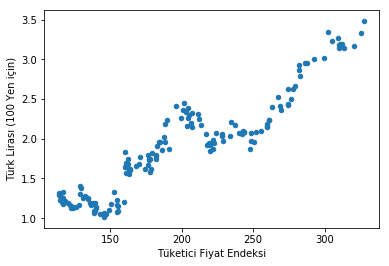

In [12]:
#GRAFİKLER...

#Tüfe miktarına bağlı olarak tl'nin değer kaybetmesi..
df_veri["Tüketici Fiyat Endeksi"] = df_veri["Tüketici Fiyat Endeksi"].astype(float)
df_veri.plot(kind='scatter', x='Tüketici Fiyat Endeksi', y='Türk Lirası (100 Yen için)')

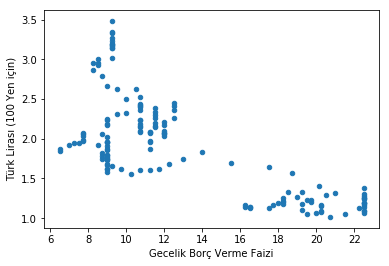

In [13]:
#Borç verme faizi arttıkça tl değer kazanıyor..
df_veri.plot(kind='scatter', x='Gecelik Borç Verme Faizi', y='Türk Lirası (100 Yen için)')


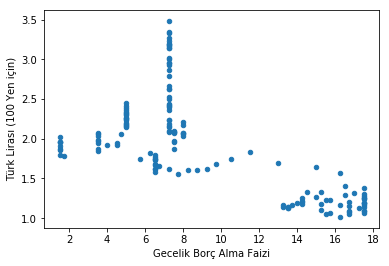

In [14]:
#Borç alma faizi arttıkça tl değer kazanıyor..
df_veri.plot(kind='scatter', x='Gecelik Borç Alma Faizi', y='Türk Lirası (100 Yen için)')


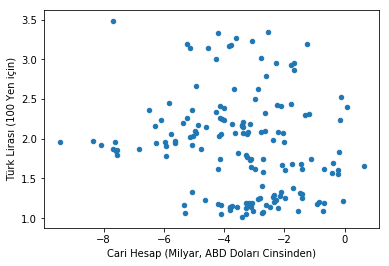

In [15]:
#Cari hesap pozitife çıktıkça tl'nin değer kazanması gerek..
df_veri.plot(kind='scatter', x='Cari Hesap (Milyar, ABD Doları Cinsinden)', y='Türk Lirası (100 Yen için)')


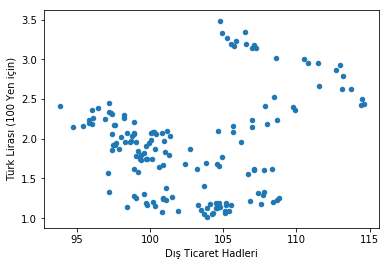

In [16]:
#Dış ticaret hadleri arttıkça yani ihracat(dışsatım)/ithalat(dışalım) oranı arttıkça tl'nin değer kaybetmesi..
df_veri.plot(kind='scatter', x='Dış Ticaret Hadleri', y='Türk Lirası (100 Yen için)')


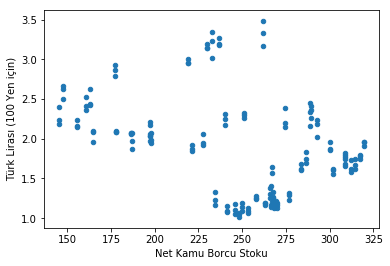

In [17]:
#Değişkenlik gösteriyor..
df_veri.plot(kind='scatter', x='Net Kamu Borcu Stoku', y='Türk Lirası (100 Yen için)')


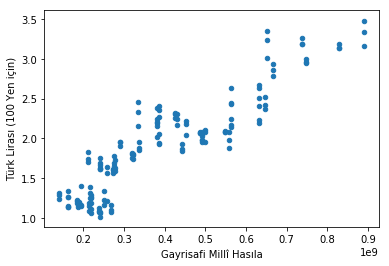

In [18]:
#GSMH arttıkça, tl değer kaybediyor..
df_veri.plot(kind='scatter', x='Gayrisafi Millî Hasıla', y='Türk Lirası (100 Yen için)')

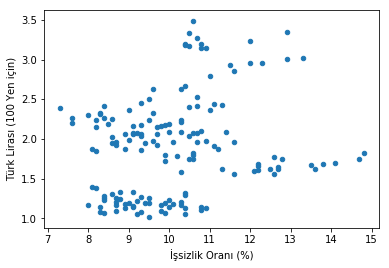

In [19]:
#İşsizlik oranı arttıkça genelde tl değer kaybediyor..
df_veri.plot(kind='scatter', x='İşsizlik Oranı (%)', y='Türk Lirası (100 Yen için)')

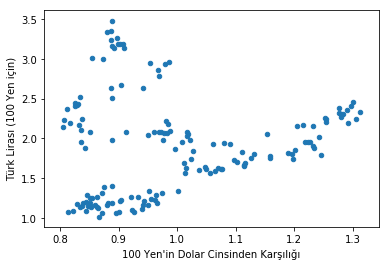

In [20]:
#Tl'nin 100 Yen'in dolar cinsinden karşılığında genelde azalmaya meyili var..
df_veri.plot(kind='scatter', x='100 Yen\'in Dolar Cinsinden Karşılığı', y='Türk Lirası (100 Yen için)')

In [21]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

ozellikler = ["Tüketici Fiyat Endeksi", "Gecelik Borç Verme Faizi", "Gecelik Borç Alma Faizi", "Cari Hesap (Milyar, ABD Doları Cinsinden)", "Dış Ticaret Hadleri", "Net Kamu Borcu Stoku", "Gayrisafi Millî Hasıla", "İşsizlik Oranı (%)", "100 Yen'in Dolar Cinsinden Karşılığı"] 
X = df_veri[ozellikler]
y = df_veri["Türk Lirası (100 Yen için)"].values.reshape(-1, 1)
#lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
model = lm.fit(X,y)
#model.intercept_
#model.coef_
#scores = scores = cross_val_score(lm, X, y, cv=10, scoring="r2")
predicted = cross_val_predict(model, X, y, cv=10)

#Tahmin Değerleri...
#predicted

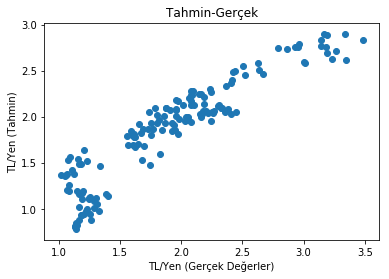

In [22]:
plt.scatter(y, predicted)
plt.title('Tahmin-Gerçek')
plt.xlabel('TL/Yen (Gerçek Değerler)')
plt.ylabel('TL/Yen (Tahmin)')
plt.show()

In [23]:
#Explained variance değeri...
variance_score = metrics.explained_variance_score(y, predicted)
variance_score

0.8532441152182406

In [24]:
#Mean Squared Error Değeri.. 
#http://scikit-learn.org/stable/modules/model_evaluation.html
mean_squared_error = metrics.mean_squared_error(y, predicted)
mean_squared_error

0.05808120440555655

In [25]:
#R^2 (coefficient of determination) Değeri.. 
r2_score = metrics.r2_score(y, predicted)
r2_score

0.8488137307711984

In [26]:
#Mean Absolute Error Değeri..
mean_absolute_error = metrics.mean_absolute_error(y, predicted)
mean_absolute_error

0.19908407335023484

In [27]:
#Mean Squared Log Error Değeri..

mean_squared_log_error = metrics.mean_squared_log_error(y, predicted)
mean_squared_log_error

0.00766692976712825

In [28]:
#Median Absolute Error Değeri..
median_absolute_error = metrics.median_absolute_error(y, predicted)
median_absolute_error

0.17939451862293798

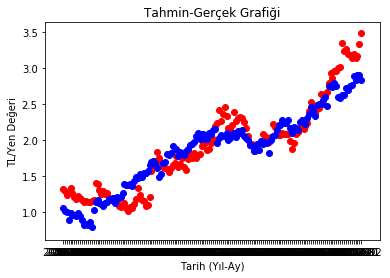

In [29]:
#Gerçek TL/Yen değerleri (kırmızı) ve tahmin edilen TL/Yen değerleri(mavi)..
index = df_veri.index.to_series().astype(str)

plt.scatter(index, df_veri["Türk Lirası (100 Yen için)"], color = 'red')
plt.scatter(index, predicted, color = 'blue')
plt.title('Tahmin-Gerçek Grafiği')
plt.xlabel('Tarih (Yıl-Ay)')
plt.ylabel('TL/Yen Değeri')
#plt.rcParams["figure.figsize"] = [15,10]
plt.show()

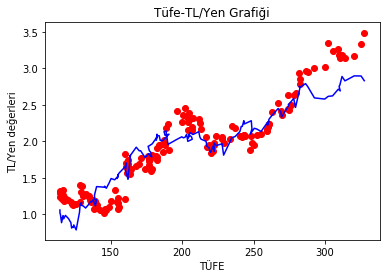

In [30]:
#Gerçek TÜFE-TL/Yen ilişkisi (kırmızı), TÜFE ile TL/Yen arasındaki ilişkiden yapılan tahmin mavi. 
plt.scatter(df_veri["Tüketici Fiyat Endeksi"], y, color = 'red')
plt.plot(df_veri["Tüketici Fiyat Endeksi"], predicted, color = 'blue')
plt.title('Tüfe-TL/Yen Grafiği')
plt.xlabel('TÜFE')
plt.ylabel('TL/Yen değerleri')
plt.show()

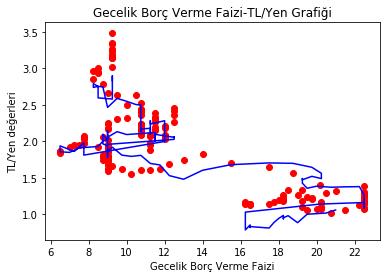

In [31]:
#Gecelik borç verme faizi ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Gecelik Borç Verme Faizi"], y, color = 'red')
plt.plot(df_veri["Gecelik Borç Verme Faizi"], predicted, color = 'blue')
plt.title('Gecelik Borç Verme Faizi-TL/Yen Grafiği')
plt.xlabel('Gecelik Borç Verme Faizi')
plt.ylabel('TL/Yen değerleri')
plt.show()

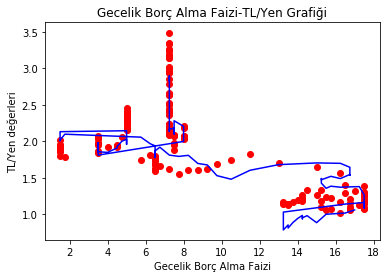

In [32]:
#Gecelik borç alma faizi ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Gecelik Borç Alma Faizi"], y, color = 'red')
plt.plot(df_veri["Gecelik Borç Alma Faizi"], predicted, color = 'blue')
plt.title('Gecelik Borç Alma Faizi-TL/Yen Grafiği')
plt.xlabel('Gecelik Borç Alma Faizi')
plt.ylabel('TL/Yen değerleri')
plt.show()

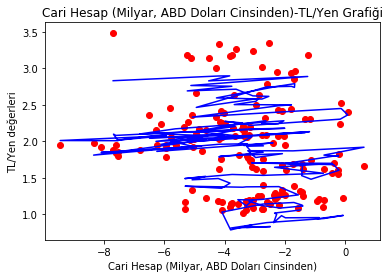

In [33]:
#Cari Hesap (Milyar, ABD Doları Cinsinden) ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Cari Hesap (Milyar, ABD Doları Cinsinden)"], y, color = 'red')
plt.plot(df_veri["Cari Hesap (Milyar, ABD Doları Cinsinden)"], predicted, color = 'blue')
plt.title('Cari Hesap (Milyar, ABD Doları Cinsinden)-TL/Yen Grafiği')
plt.xlabel('Cari Hesap (Milyar, ABD Doları Cinsinden)')
plt.ylabel('TL/Yen değerleri')
plt.show()

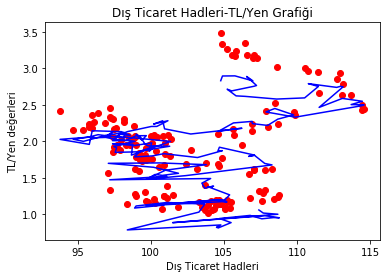

In [34]:
#Dış Ticaret Hadleri ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Dış Ticaret Hadleri"], y, color = 'red')
plt.plot(df_veri["Dış Ticaret Hadleri"], predicted, color = 'blue')
plt.title('Dış Ticaret Hadleri-TL/Yen Grafiği')
plt.xlabel('Dış Ticaret Hadleri')
plt.ylabel('TL/Yen değerleri')
plt.show()

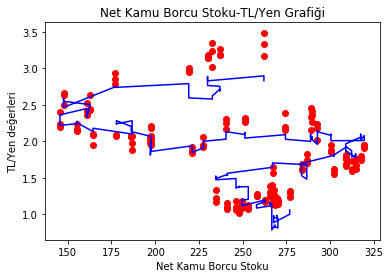

In [35]:
#Net Kamu Borcu Stoku ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Net Kamu Borcu Stoku"], y, color = 'red')
plt.plot(df_veri["Net Kamu Borcu Stoku"], predicted, color = 'blue')
plt.title('Net Kamu Borcu Stoku-TL/Yen Grafiği')
plt.xlabel('Net Kamu Borcu Stoku')
plt.ylabel('TL/Yen değerleri')
plt.show()

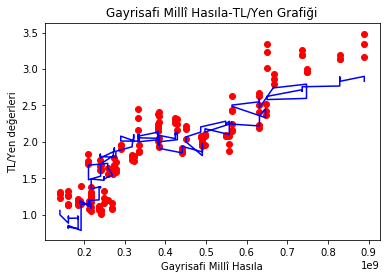

In [36]:
#Gayrisafi Millî Hasıla ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["Gayrisafi Millî Hasıla"], y, color = 'red')
plt.plot(df_veri["Gayrisafi Millî Hasıla"], predicted, color = 'blue')
plt.title('Gayrisafi Millî Hasıla-TL/Yen Grafiği')
plt.xlabel('Gayrisafi Millî Hasıla')
plt.ylabel('TL/Yen değerleri')
plt.show()

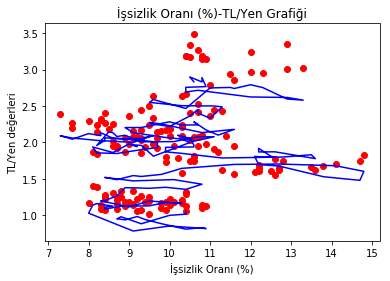

In [37]:
#İşsizlik Oranı (%) ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["İşsizlik Oranı (%)"], y, color = 'red')
plt.plot(df_veri["İşsizlik Oranı (%)"], predicted, color = 'blue')
plt.title('İşsizlik Oranı (%)-TL/Yen Grafiği')
plt.xlabel('İşsizlik Oranı (%)')
plt.ylabel('TL/Yen değerleri')
plt.show()

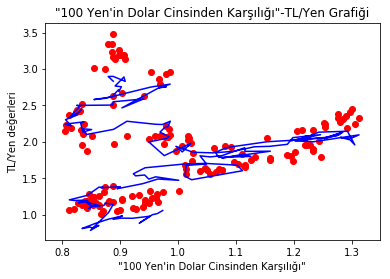

In [38]:
#100 Yen'in Dolar Cinsinden Karşılığı ile eski ve tahmini yeni TL değerleri arasındaki ilişkiyi gösterir grafik..
plt.scatter(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"], y, color = 'red')
plt.plot(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"], predicted, color = 'blue')
plt.title('"100 Yen\'in Dolar Cinsinden Karşılığı"-TL/Yen Grafiği')
plt.xlabel('"100 Yen\'in Dolar Cinsinden Karşılığı"')
plt.ylabel('TL/Yen değerleri')
plt.show()

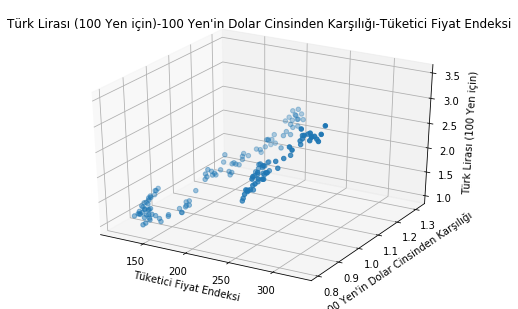

In [39]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Tüketici Fiyat Endeksi arasındaki ilişkiyi gösteren scatter grafiği..

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Tüketici Fiyat Endeksi"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.xlabel("Tüketici Fiyat Endeksi")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Tüketici Fiyat Endeksi")
pyplot.show()

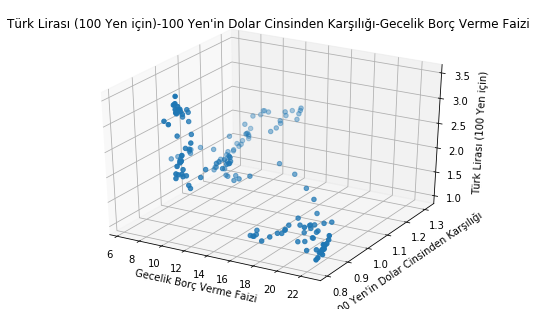

In [40]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Gecelik Borç Verme Faizi arasındaki ilişkiyi gösteren scatter grafiği..
fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Gecelik Borç Verme Faizi"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Gecelik Borç Verme Faizi")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Gecelik Borç Verme Faizi")
pyplot.show()

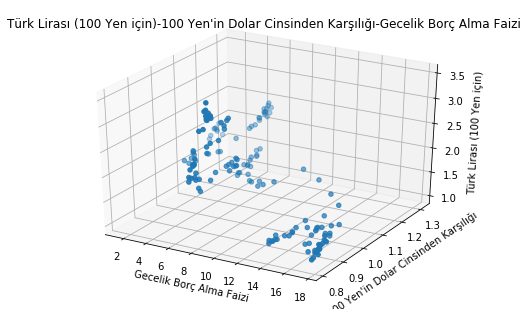

In [41]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Gecelik Borç Alma Faizi arasındaki ilişkiyi gösteren scatter grafiği..
fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Gecelik Borç Alma Faizi"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Gecelik Borç Alma Faizi")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Gecelik Borç Alma Faizi")
pyplot.show()

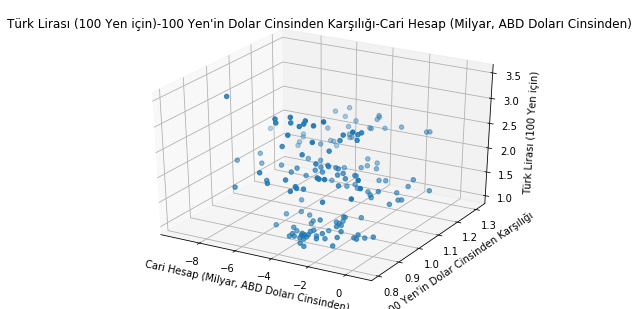

In [42]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Cari Hesap (Milyar, ABD Doları Cinsinden) arasındaki ilişkiyi gösteren scatter grafiği..
fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Cari Hesap (Milyar, ABD Doları Cinsinden)"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Cari Hesap (Milyar, ABD Doları Cinsinden)")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Cari Hesap (Milyar, ABD Doları Cinsinden)")
pyplot.show()

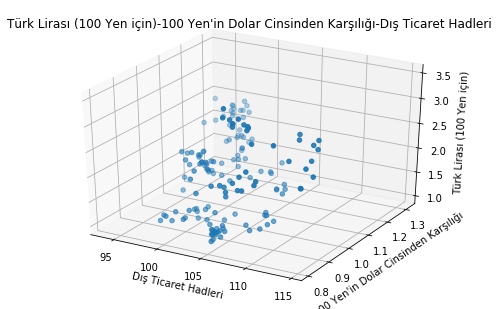

In [47]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Dış Ticaret Hadleri arasındaki ilişkiyi gösteren scatter grafiği..

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Dış Ticaret Hadleri"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Dış Ticaret Hadleri")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Dış Ticaret Hadleri")
pyplot.show()

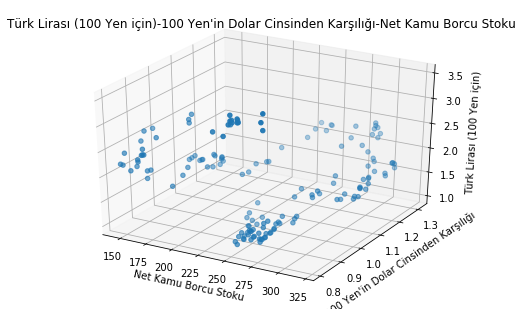

In [48]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Net Kamu Borcu Stoku arasındaki ilişkiyi gösteren scatter grafiği..

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Net Kamu Borcu Stoku"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Net Kamu Borcu Stoku")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Net Kamu Borcu Stoku")
pyplot.show()

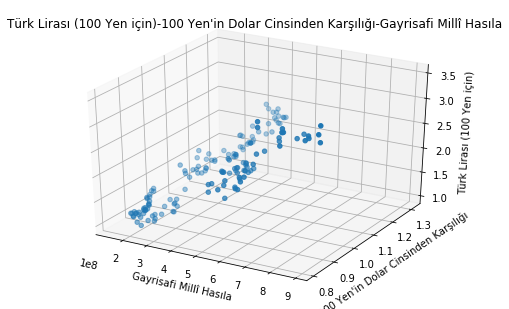

In [45]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve Gayrisafi Millî Hasıla arasındaki ilişkiyi gösteren scatter grafiği..

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["Gayrisafi Millî Hasıla"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("Gayrisafi Millî Hasıla")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-Gayrisafi Millî Hasıla")
pyplot.show()

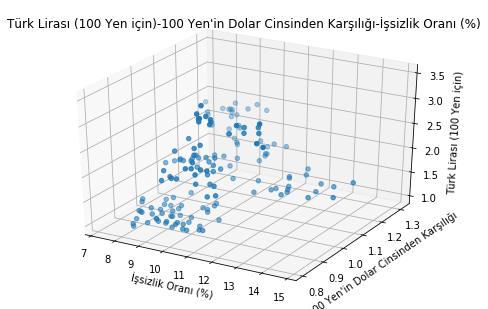

In [46]:
#100 Yen'in Dolar Cinsinden Karşılığı, 100 yen için tl ve İşsizlik Oranı (%) arasındaki ilişkiyi gösteren scatter grafiği..

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_y_vals = list(df_veri["100 Yen'in Dolar Cinsinden Karşılığı"])
sequence_containing_z_vals = list(df_veri["Türk Lirası (100 Yen için)"])
sequence_containing_x_vals = list(df_veri["İşsizlik Oranı (%)"])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.ylabel("100 Yen'in Dolar Cinsinden Karşılığı")
plt.xlabel("İşsizlik Oranı (%)")
ax.set_zlabel("Türk Lirası (100 Yen için)")
plt.title("Türk Lirası (100 Yen için)-100 Yen'in Dolar Cinsinden Karşılığı-İşsizlik Oranı (%)")
pyplot.show()